<a href="https://colab.research.google.com/github/vanshikaishpunyani/Projects/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *CREDIT RISK ANALYSIS*

***DOMAIN:Public Domain*** --- *Credit Bureau Data*

***DATA:*** *from Kaggle*

***DATA DICTIONARY:***

person_age: Age

person_income: Annual Income

person_home_ownership:	Home ownership

person_emp_length:	Employment length (in years)

loan_intent:	Loan intent

loan_grade:	Loan grade

loan_amnt:	Loan amount

loan_int_rate:	Interest rate

loan_status:	Loan status (0 is non default 1 is default)

loan_percent_income:	Percentage of income dedicated for mortgage

cb_person_default_on_file:	Historical default

cb_preson_cred_hist_length:	Credit history length


***PROJECT OBJECTIVE:***
 *The system will analyze client data and determine whether a client should be provided with a loan or not based on their creditworthiness.

The classification will help lenders and financial institutions make informed decisions about loan approvals, reducing the risk of defaults and ensuring responsible lending practices.*

# *Importing Required Packages*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# *Exploring The Data*

In [2]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.shape

(32581, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.duplicated().value_counts()

False    32416
True       165
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

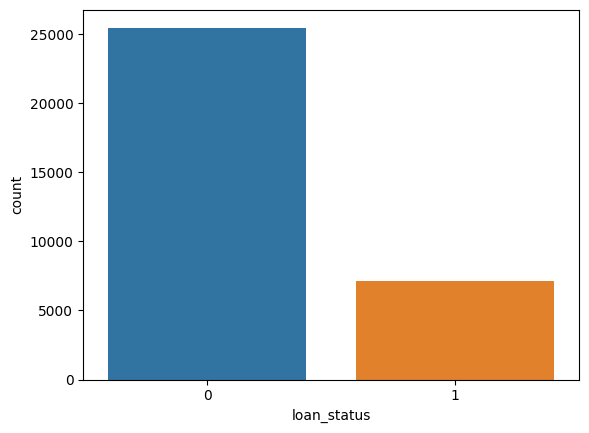

In [7]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']
sns.countplot(x=Y)

***here we can clearly see that the data is imbalanced***

In [8]:
cat_X =X.select_dtypes(include=['object'])
num_X =X.select_dtypes(include=['number'])

# *Data Visualisation*

***categorical variables***

In [9]:
cat_X.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7eb209f92830>,
 [Text(0.8938423148935386, 0.6411286268025788, 'EDUCATION'),
  Text(-0.2817714083899489, 1.0632990517318939, 'MEDICAL'),
  Text(-1.0832157895294152, 0.19142505926384257, 'VENTURE'),
  Text(-0.6760811039708807, -0.8677063678765503, 'PERSONAL'),
  Text(0.4008687048430509, -1.0243555444656192, 'DEBTCONSOLIDATION'),
  Text(1.0342089475678917, -0.3747156959222735, 'HOMEIMPROVEMENT')],
 [Text(0.48755035357829374, 0.34970652371049743, '19.8%'),
  Text(-0.15369349548542666, 0.5799813009446694, '18.6%'),
  Text(-0.5908449761069537, 0.10441366868936867, '17.6%'),
  Text(-0.368771511256844, -0.4732943824781183, '16.9%'),
  Text(0.21865565718711866, -0.5587393878903377, '16.0%'),
  Text(0.5641139714006682, -0.20439037959396733, '11.1%')])

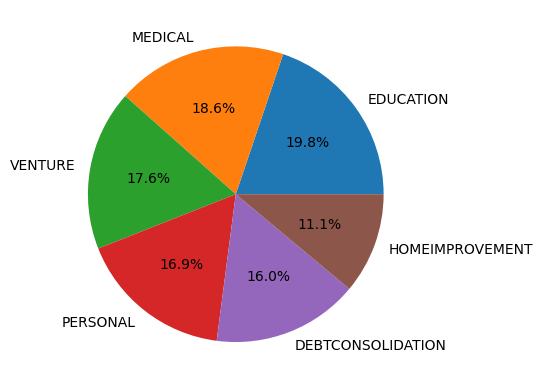

In [10]:
plt.pie(cat_X['loan_intent'].value_counts(), labels=cat_X['loan_intent'].value_counts().index, autopct='%1.1f%%')

***there is little variation in the reason why people are applying for loans with education being the most common reason and home improvement being the least common.***

<Axes: xlabel='loan_status', ylabel='count'>

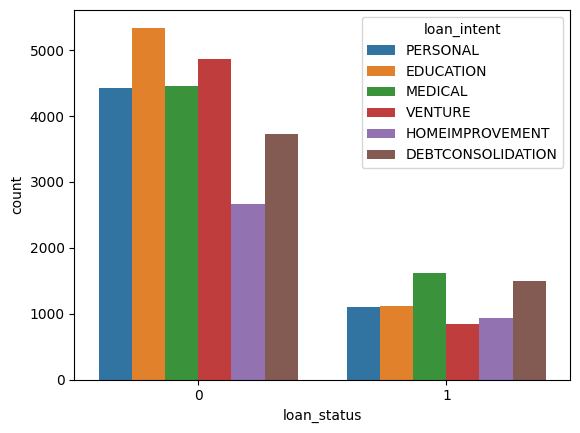

In [11]:
sns.countplot(x=df["loan_status"], hue=df["loan_intent"])

***yet among all, those who default the most frequently either have applied for medical or consolidate debt. loan***

([<matplotlib.patches.Wedge at 0x7eb209ec1ea0>,
 [Text(-0.016492727707304693, 1.0998763521108965, 'RENT'),
  Text(-0.2662604648641987, -1.0672887916821299, 'MORTGAGE'),
  Text(1.0602082341284313, -0.293186801009652, 'OWN'),
  Text(1.099941453708745, -0.011348938853167078, 'OTHER')],
 [Text(-0.008996033294893468, 0.5999325556968526, '50.5%'),
  Text(-0.14523298083501743, -0.5821575227357072, '41.3%'),
  Text(0.5782954004336898, -0.159920073277992, '7.9%'),
  Text(0.5999680656593154, -0.006190330283545678, '0.3%')])

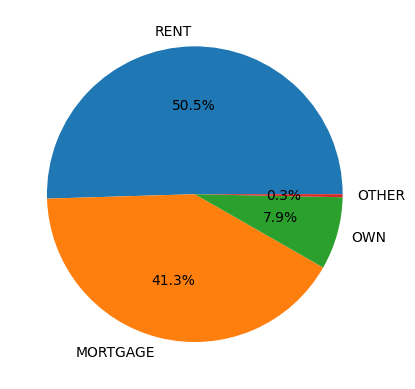

In [12]:
plt.pie(cat_X['person_home_ownership'].value_counts(), labels=cat_X['person_home_ownership'].value_counts().index, autopct='%1.1f%%')

***most people applying for loan are either renting accomodations or have a mortgage on their home. This makes sense as neither the very rich or very poor people would apply for loans.***

<Axes: xlabel='loan_status', ylabel='count'>

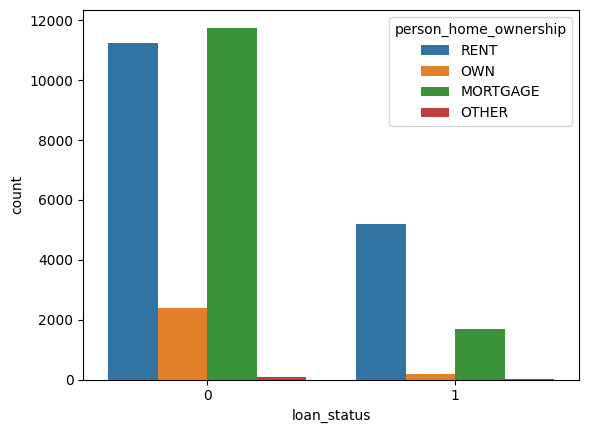

In [13]:
sns.countplot(x=df["loan_status"], hue=df["person_home_ownership"])

***The number of renters and homeowners with mortgages is roughly equal, while those with leased homes make up more than twice as many loan defaulters as those with mortgaged homes.***

([<matplotlib.patches.Wedge at 0x7eb209d97490>,
 [Text(0.5576368114500041, 0.9481778243113855, 'A'),
  Text(-1.0983038470653415, 0.061062750687069844, 'B'),
  Text(0.0045079893382277345, -1.0999907627030905, 'C'),
  Text(0.9113591022373447, -0.6159745017199504, 'D'),
  Text(1.0873553027167957, -0.16630828498203415, 'E'),
  Text(1.0993037951202542, -0.03913011671597992, 'F'),
  Text(1.0999790553920157, -0.006788055604452408, 'G')],
 [Text(0.304165533518184, 0.5171879041698466, '33.1%'),
  Text(-0.5990748256720043, 0.033306954920219914, '32.1%'),
  Text(0.002458903275396946, -0.5999949614744129, '19.8%'),
  Text(0.49710496485673344, -0.3359860918472456, '11.1%'),
  Text(0.5931028923909795, -0.09071360999020044, '3.0%'),
  Text(0.599620251883775, -0.021343700026898137, '0.7%'),
  Text(0.5999885756683722, -0.003702575784246767, '0.2%')])

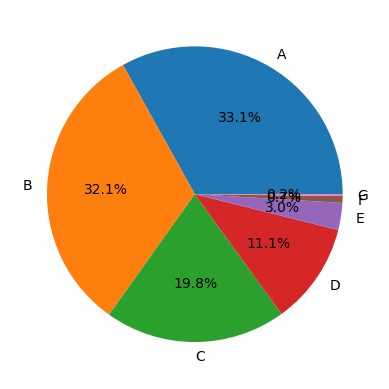

In [14]:
plt.pie(cat_X['loan_grade'].value_counts(), labels=cat_X['loan_grade'].value_counts().index, autopct='%1.1f%%')

***A,B and C are the most common classifications. This seems to fall in line because most people do not default and therefore are given better grades.***

<Axes: xlabel='loan_status', ylabel='count'>

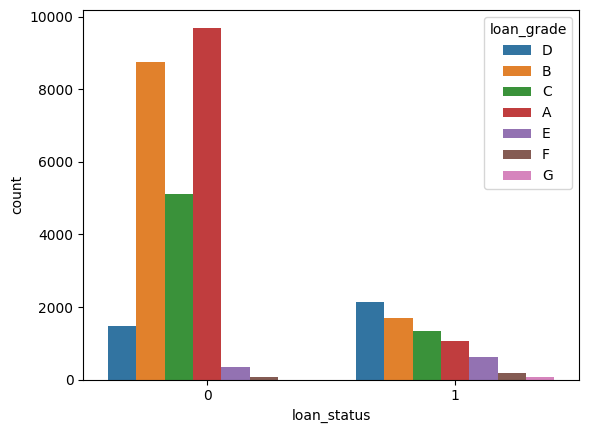

In [15]:
sns.countplot(x=df["loan_status"], hue=df["loan_grade"])

***People really behaved in accordance with the grade they were given, with D representing the majority of defaulters and A representing the majority of non-defaulters.***

([<matplotlib.patches.Wedge at 0x7eb209c9fc40>,
 [Text(-0.9354948978099727, 0.5786616422154737, 'N'),
  Text(0.9354948436317556, -0.5786617298028247, 'Y')],
 [Text(-0.5102699442599851, 0.31563362302662196, '82.4%'),
  Text(0.5102699147082302, -0.31563367080154076, '17.6%')])

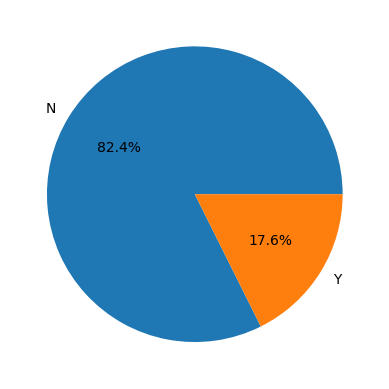

In [16]:
plt.pie(cat_X['cb_person_default_on_file'].value_counts(), labels=cat_X['cb_person_default_on_file'].value_counts().index, autopct='%1.1f%%')

***most people have previously not defaulted.***

<Axes: xlabel='loan_status', ylabel='count'>

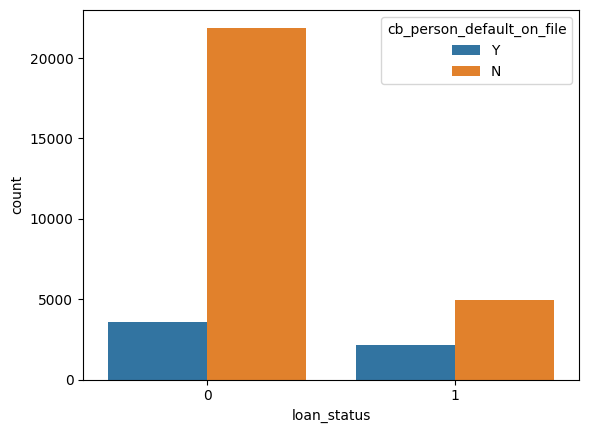

In [17]:
sns.countplot(x=df["loan_status"], hue=df["cb_person_default_on_file"])

***It should come as no surprise that defaulters repeated their history and some non-defaulters joined them.***

***numerical variables***

In [18]:
num_X.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


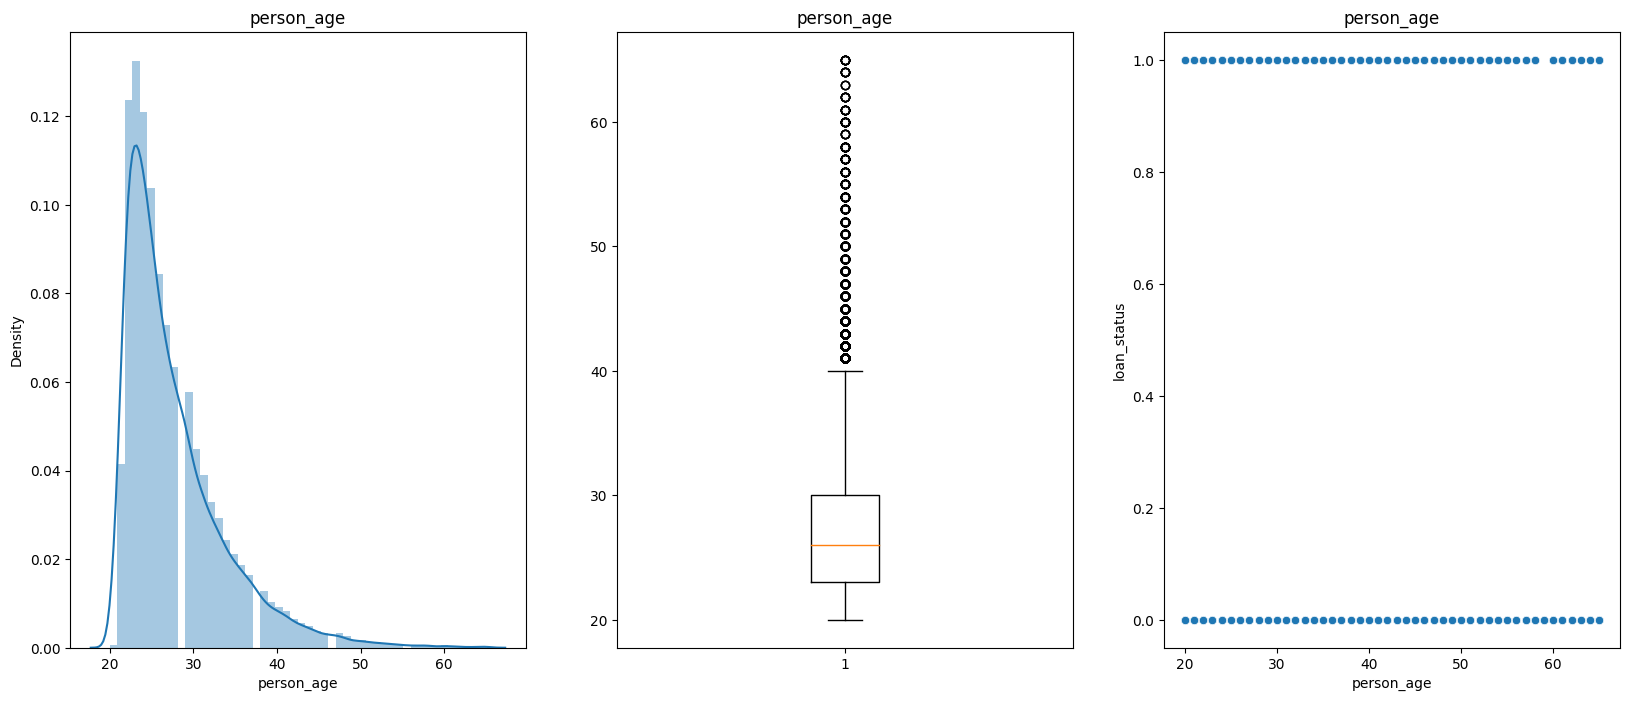

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


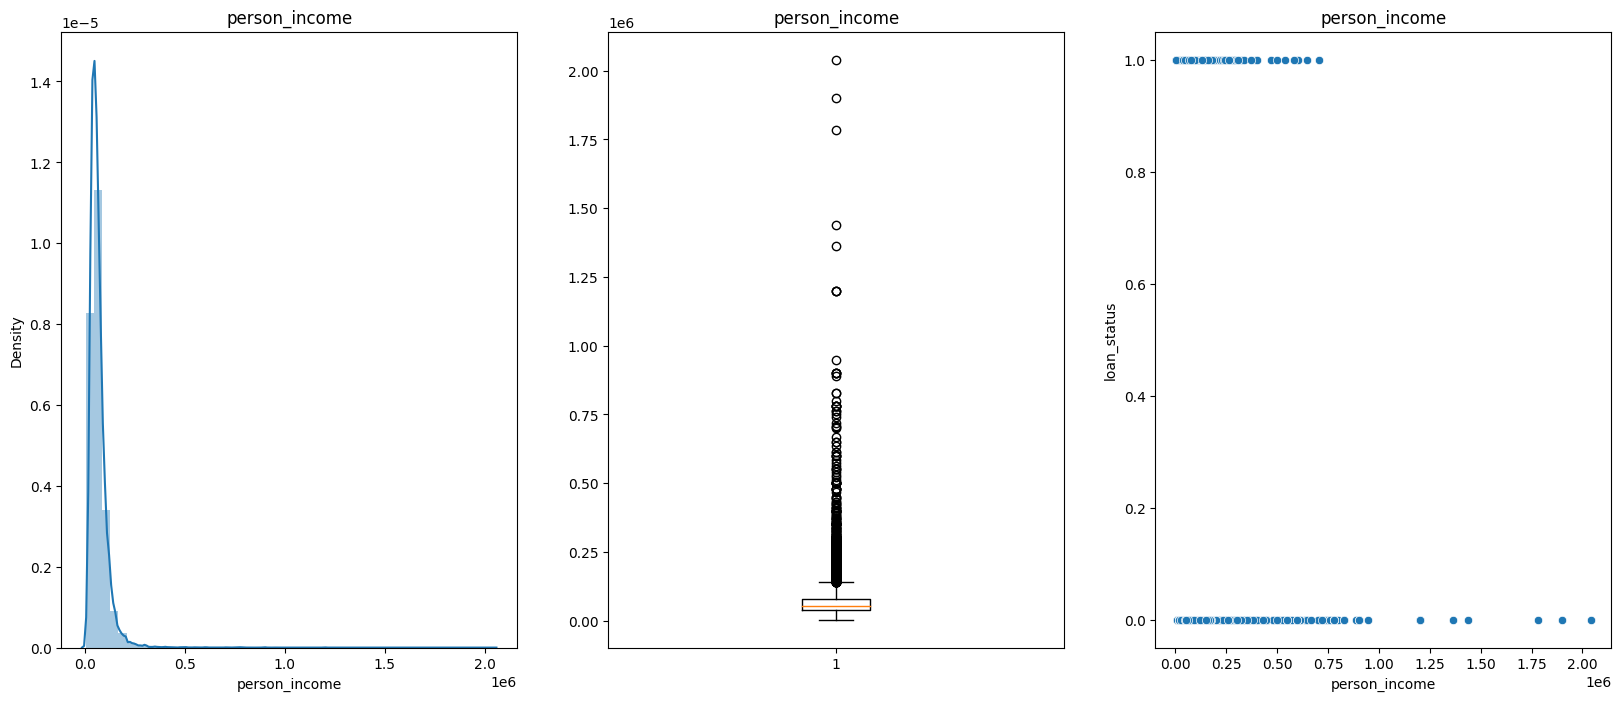

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


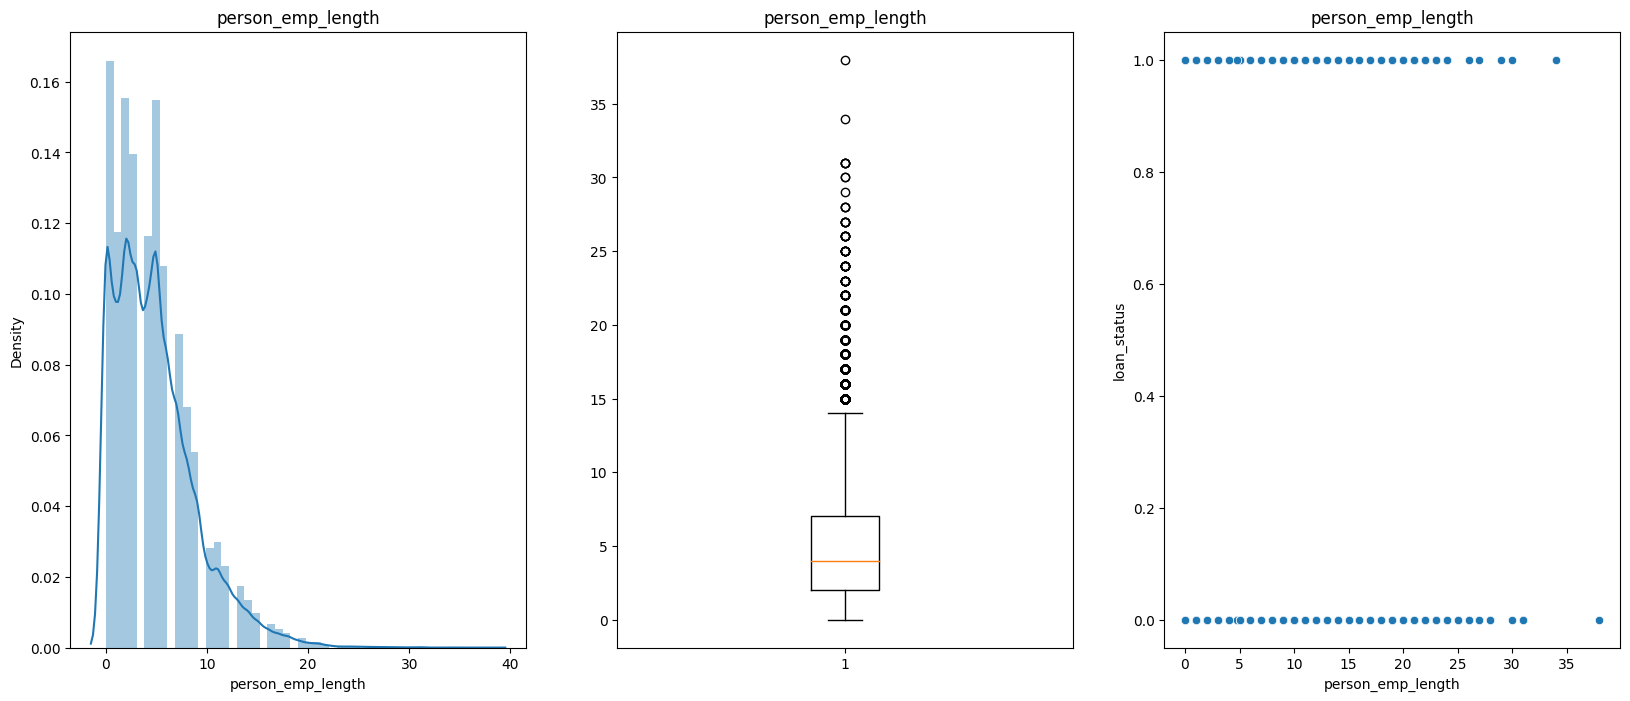

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


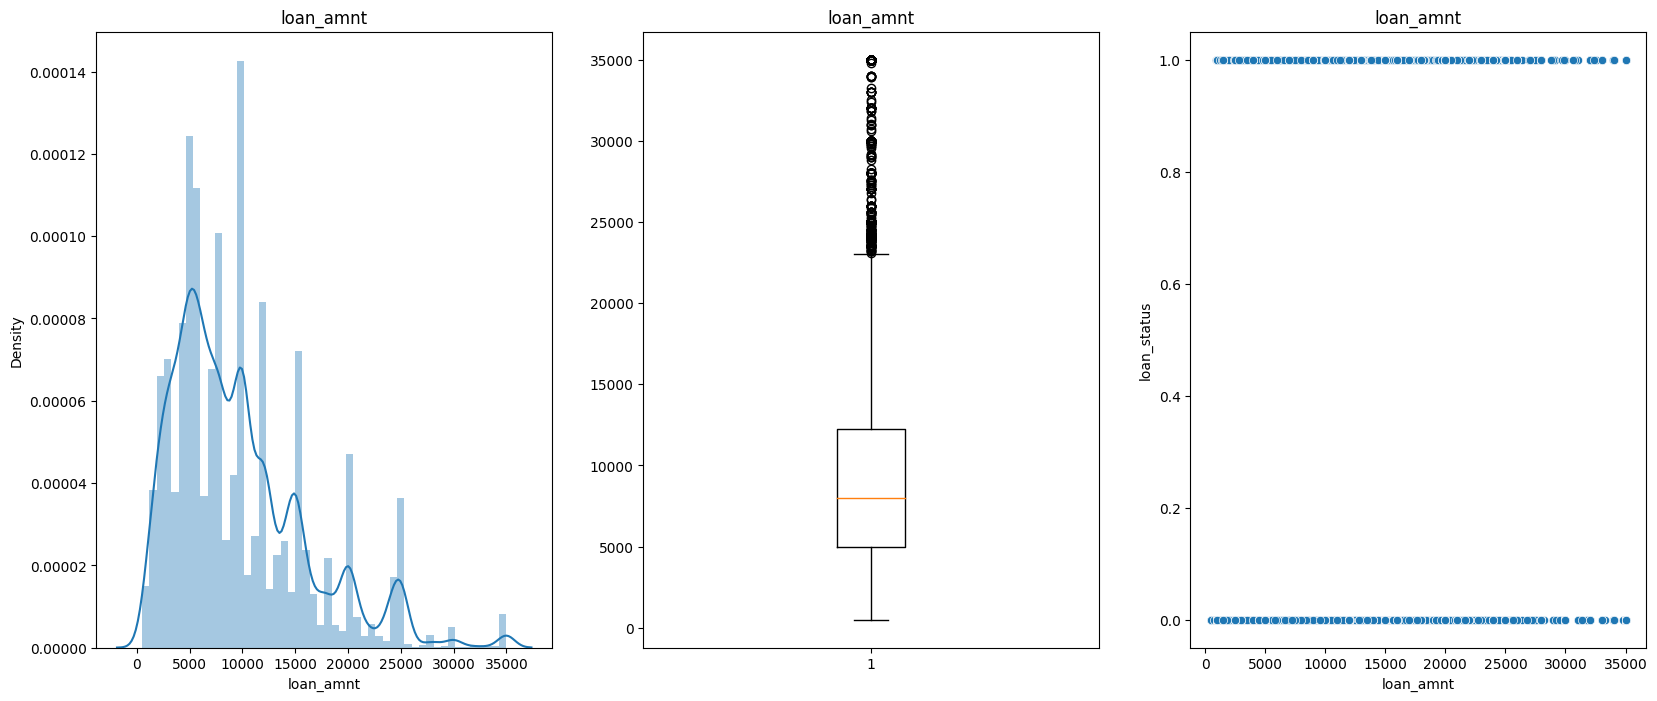

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


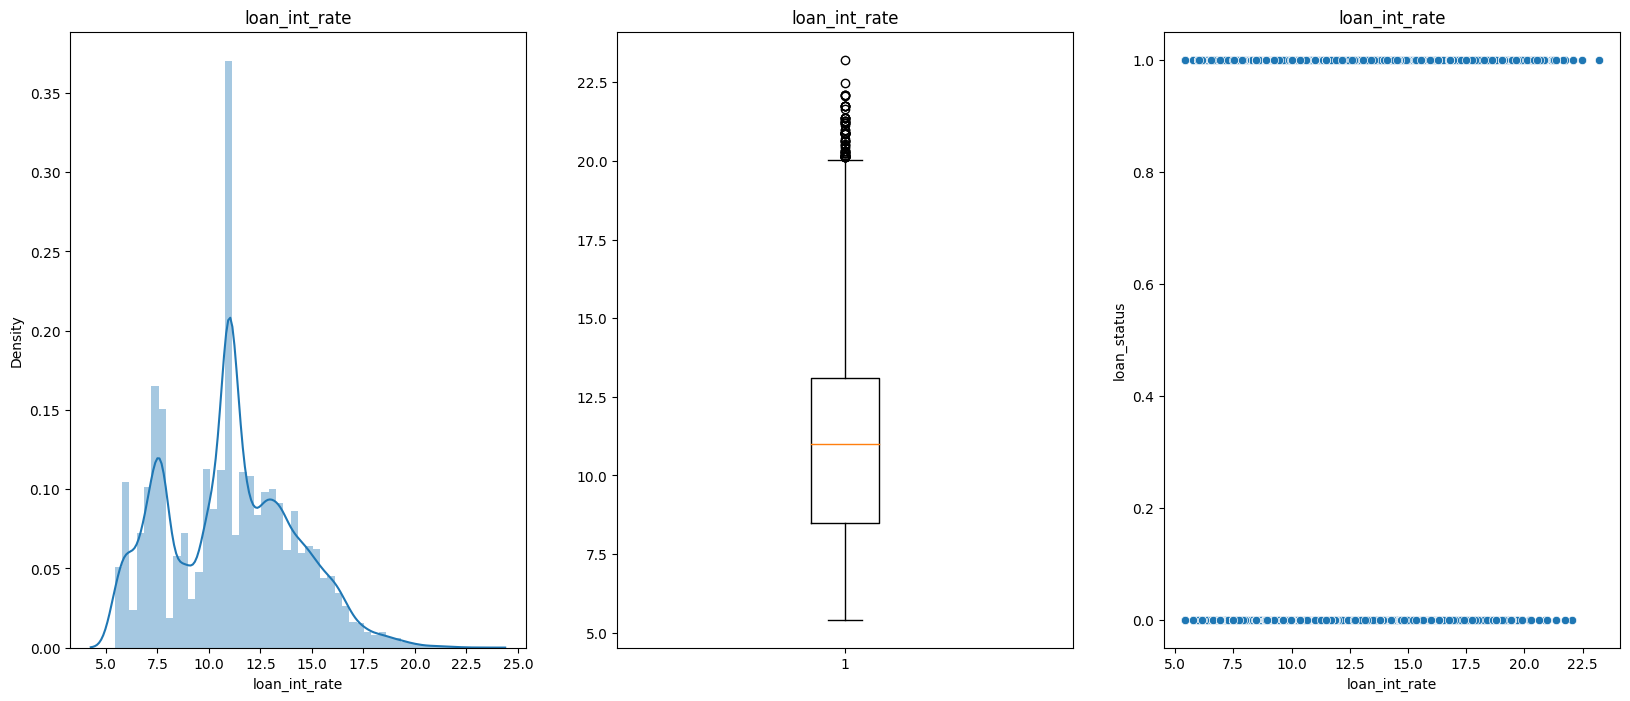

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


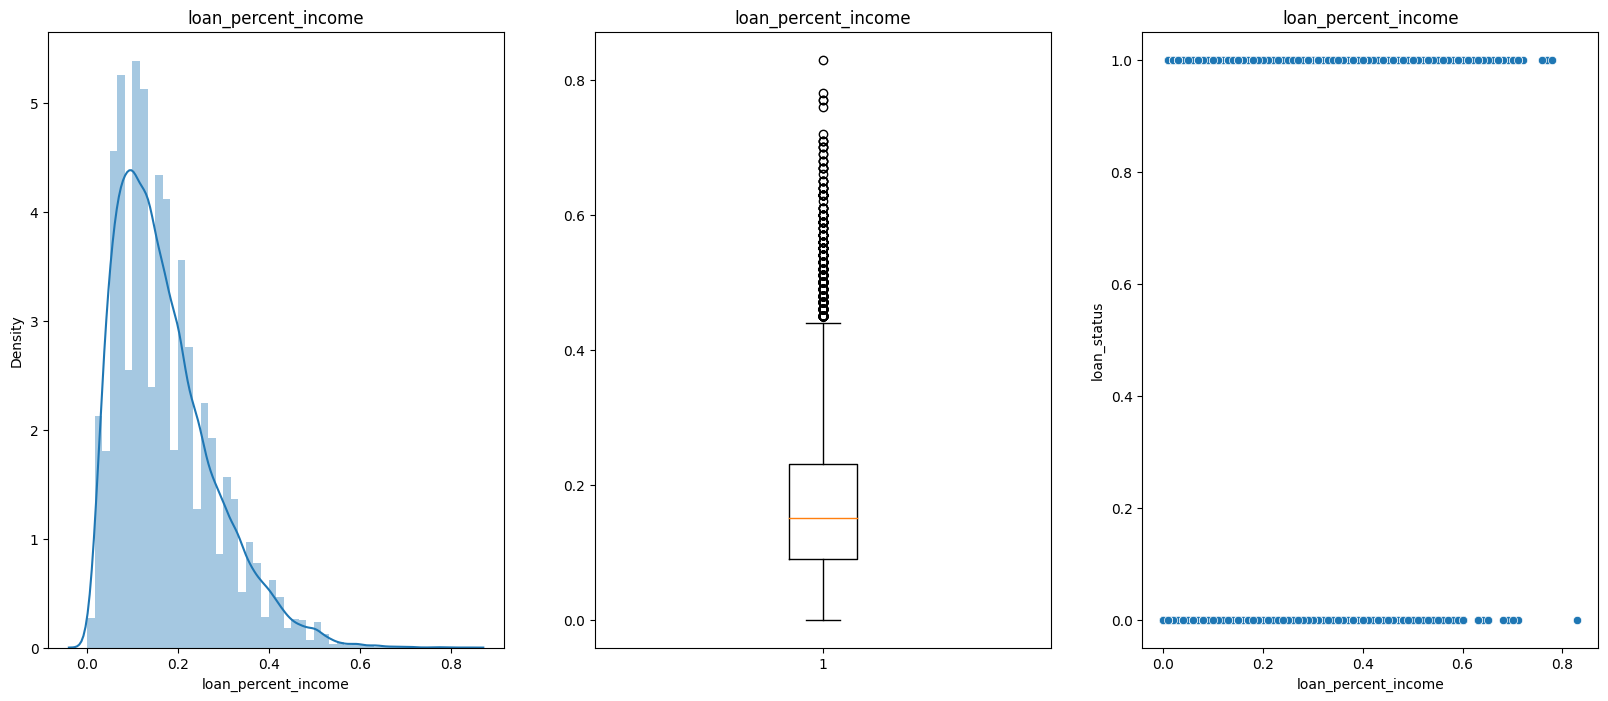

<ipython-input-55-e5e99aa612b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_X[col])


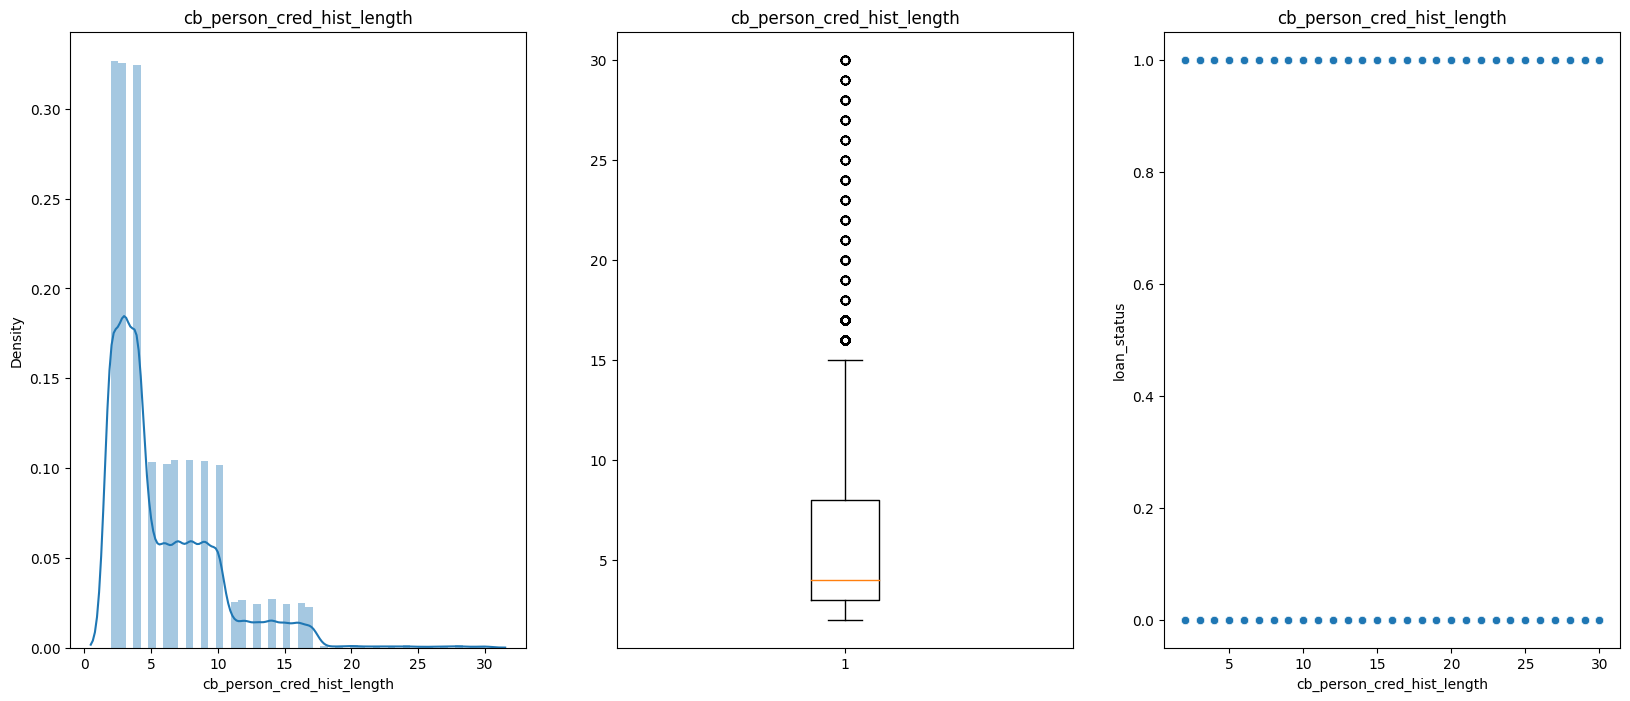

In [55]:
for col in num_X.columns:
    plt.figure(figsize=(20,8))
    plt.subplot(131)
    sns.distplot(num_X[col])
    plt.title(col)

    plt.subplot(132)
    plt.boxplot(num_X[col])
    plt.title(col)

    plt.subplot(133)
    sns.scatterplot(x=num_X[col],y=Y)
    plt.title(col)

    plt.show()

#*Cleaning The Dataset*

***null values***

In [20]:
df['loan_int_rate'].fillna(11.011695, inplace=True)
df['person_emp_length'].fillna(4.789686	, inplace=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


***duplicate values***

In [21]:
df.drop_duplicates(inplace=True)
df.reset_index
df.shape


(32416, 12)

***outliers***

***There is no federal regulation on the maximum interest rate that your issuer can charge you, though each state has its own approach to limiting interest rates.***

***Most banks and NBFCs offer personal loans to applicants in the age group of 18 years to 65 years.***

In [22]:
df=df[~(df['person_age'] > 65)]
df.reset_index
df.shape

(32381, 12)

In [23]:
#df=df[~(df['person_income'] > )]

In [24]:
df=df[~(df['person_emp_length'] > 45)]
df.reset_index
df.shape

(32379, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32379 entries, 1 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32379 non-null  int64  
 1   person_income               32379 non-null  int64  
 2   person_home_ownership       32379 non-null  object 
 3   person_emp_length           32379 non-null  float64
 4   loan_intent                 32379 non-null  object 
 5   loan_grade                  32379 non-null  object 
 6   loan_amnt                   32379 non-null  int64  
 7   loan_int_rate               32379 non-null  float64
 8   loan_status                 32379 non-null  int64  
 9   loan_percent_income         32379 non-null  float64
 10  cb_person_default_on_file   32379 non-null  object 
 11  cb_person_cred_hist_length  32379 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [26]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [27]:
cat_X =X.select_dtypes(include=['object'])
num_X =X.select_dtypes(include=['number'])

# *Feature Preprocessing*

***Encoding of ordered data***

In [28]:
label_encoder = LabelEncoder()
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

<ipython-input-28-3ebe6ee7fab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
<ipython-input-28-3ebe6ee7fab3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])


***Encoding of nominal data***

In [29]:
nom_cat_X = cat_X.drop(cat_X.columns[[2,3]],axis=1,inplace=False)

In [30]:
nom_cat_X = pd.get_dummies(nom_cat_X, prefix=['person_home_ownership','loan_intent'])

nom_cat_X = nom_cat_X.drop(nom_cat_X.columns[[1,9]],axis=1,inplace=False)
nom_cat_X

,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
1,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0
5,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
32575,0,0,1,0,1,0,0,0
32576,1,0,0,0,0,0,0,1
32577,1,0,0,0,0,0,0,1
32578,0,0,1,0,0,1,0,0


In [31]:
df = pd.concat([df,nom_cat_X], axis=1)
df = df.drop(df.columns[[2,4]],axis=1,inplace=False)
df.reset_index
df.shape

(32379, 18)

In [32]:
X = df.drop(df.columns[[6]],axis=1,inplace=False)
Y = df['loan_status']

In [33]:
X_numerical = df[df.columns[[0,1,2,4,5,7,9]]]
X_categorical = df[df.columns[[3,8,10,11,12,13,14,15,16,17]]]
X_categorical.reset_index
X_numerical.reset_index

<bound method DataFrame.reset_index of        person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
5              21           9900                2.0       2500           7.14   
...           ...            ...                ...        ...            ...   
32575          52          64500                0.0       5000          11.26   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000        

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[df.columns[[0,1,2,4,5,7,9]]] = ss.fit_transform(df[df.columns[[0,1,2,4,5,7,9]]])
df[df.columns[[0,1,2,4,5,7,9]]]
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
1,-1.102326,-1.071988,0.054824,1,-1.359605,0.039985,0,-0.657834,0,-0.943936,0,1,0,0,1,0,0,0
2,-0.443312,-1.071988,-0.951445,2,-0.647519,0.601155,1,3.744057,0,-0.695141,1,0,0,0,0,0,1,0
3,-0.772819,-0.007486,-0.196743,2,4.020596,1.366681,1,3.369428,0,-0.943936,0,0,1,0,0,0,1,0
4,-0.608065,-0.218863,0.809525,2,4.020596,1.055280,1,3.556742,1,-0.446346,0,0,1,0,0,0,1,0
5,-1.102326,-1.066275,-0.699878,0,-1.122243,-1.257518,1,0.747025,0,-0.943936,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,4.005033,-0.026529,-1.203012,1,-0.726640,0.078910,0,-0.845148,0,3.534370,0,0,1,0,1,0,0,0
32576,4.828801,-0.245523,-0.951445,2,-0.600047,0.695223,0,-0.564176,0,6.022318,1,0,0,0,0,0,0,1
32577,4.334540,1.030356,-0.196743,0,1.271155,-1.143986,0,-0.189548,0,3.285576,1,0,0,0,0,0,0,1
32578,6.146829,0.192465,-0.448310,1,4.020596,-0.008672,1,2.713827,0,5.524729,0,0,1,0,0,1,0,0


In [35]:
X = df.drop(df.columns[[6]],axis=1,inplace=False)
Y = df['loan_status']

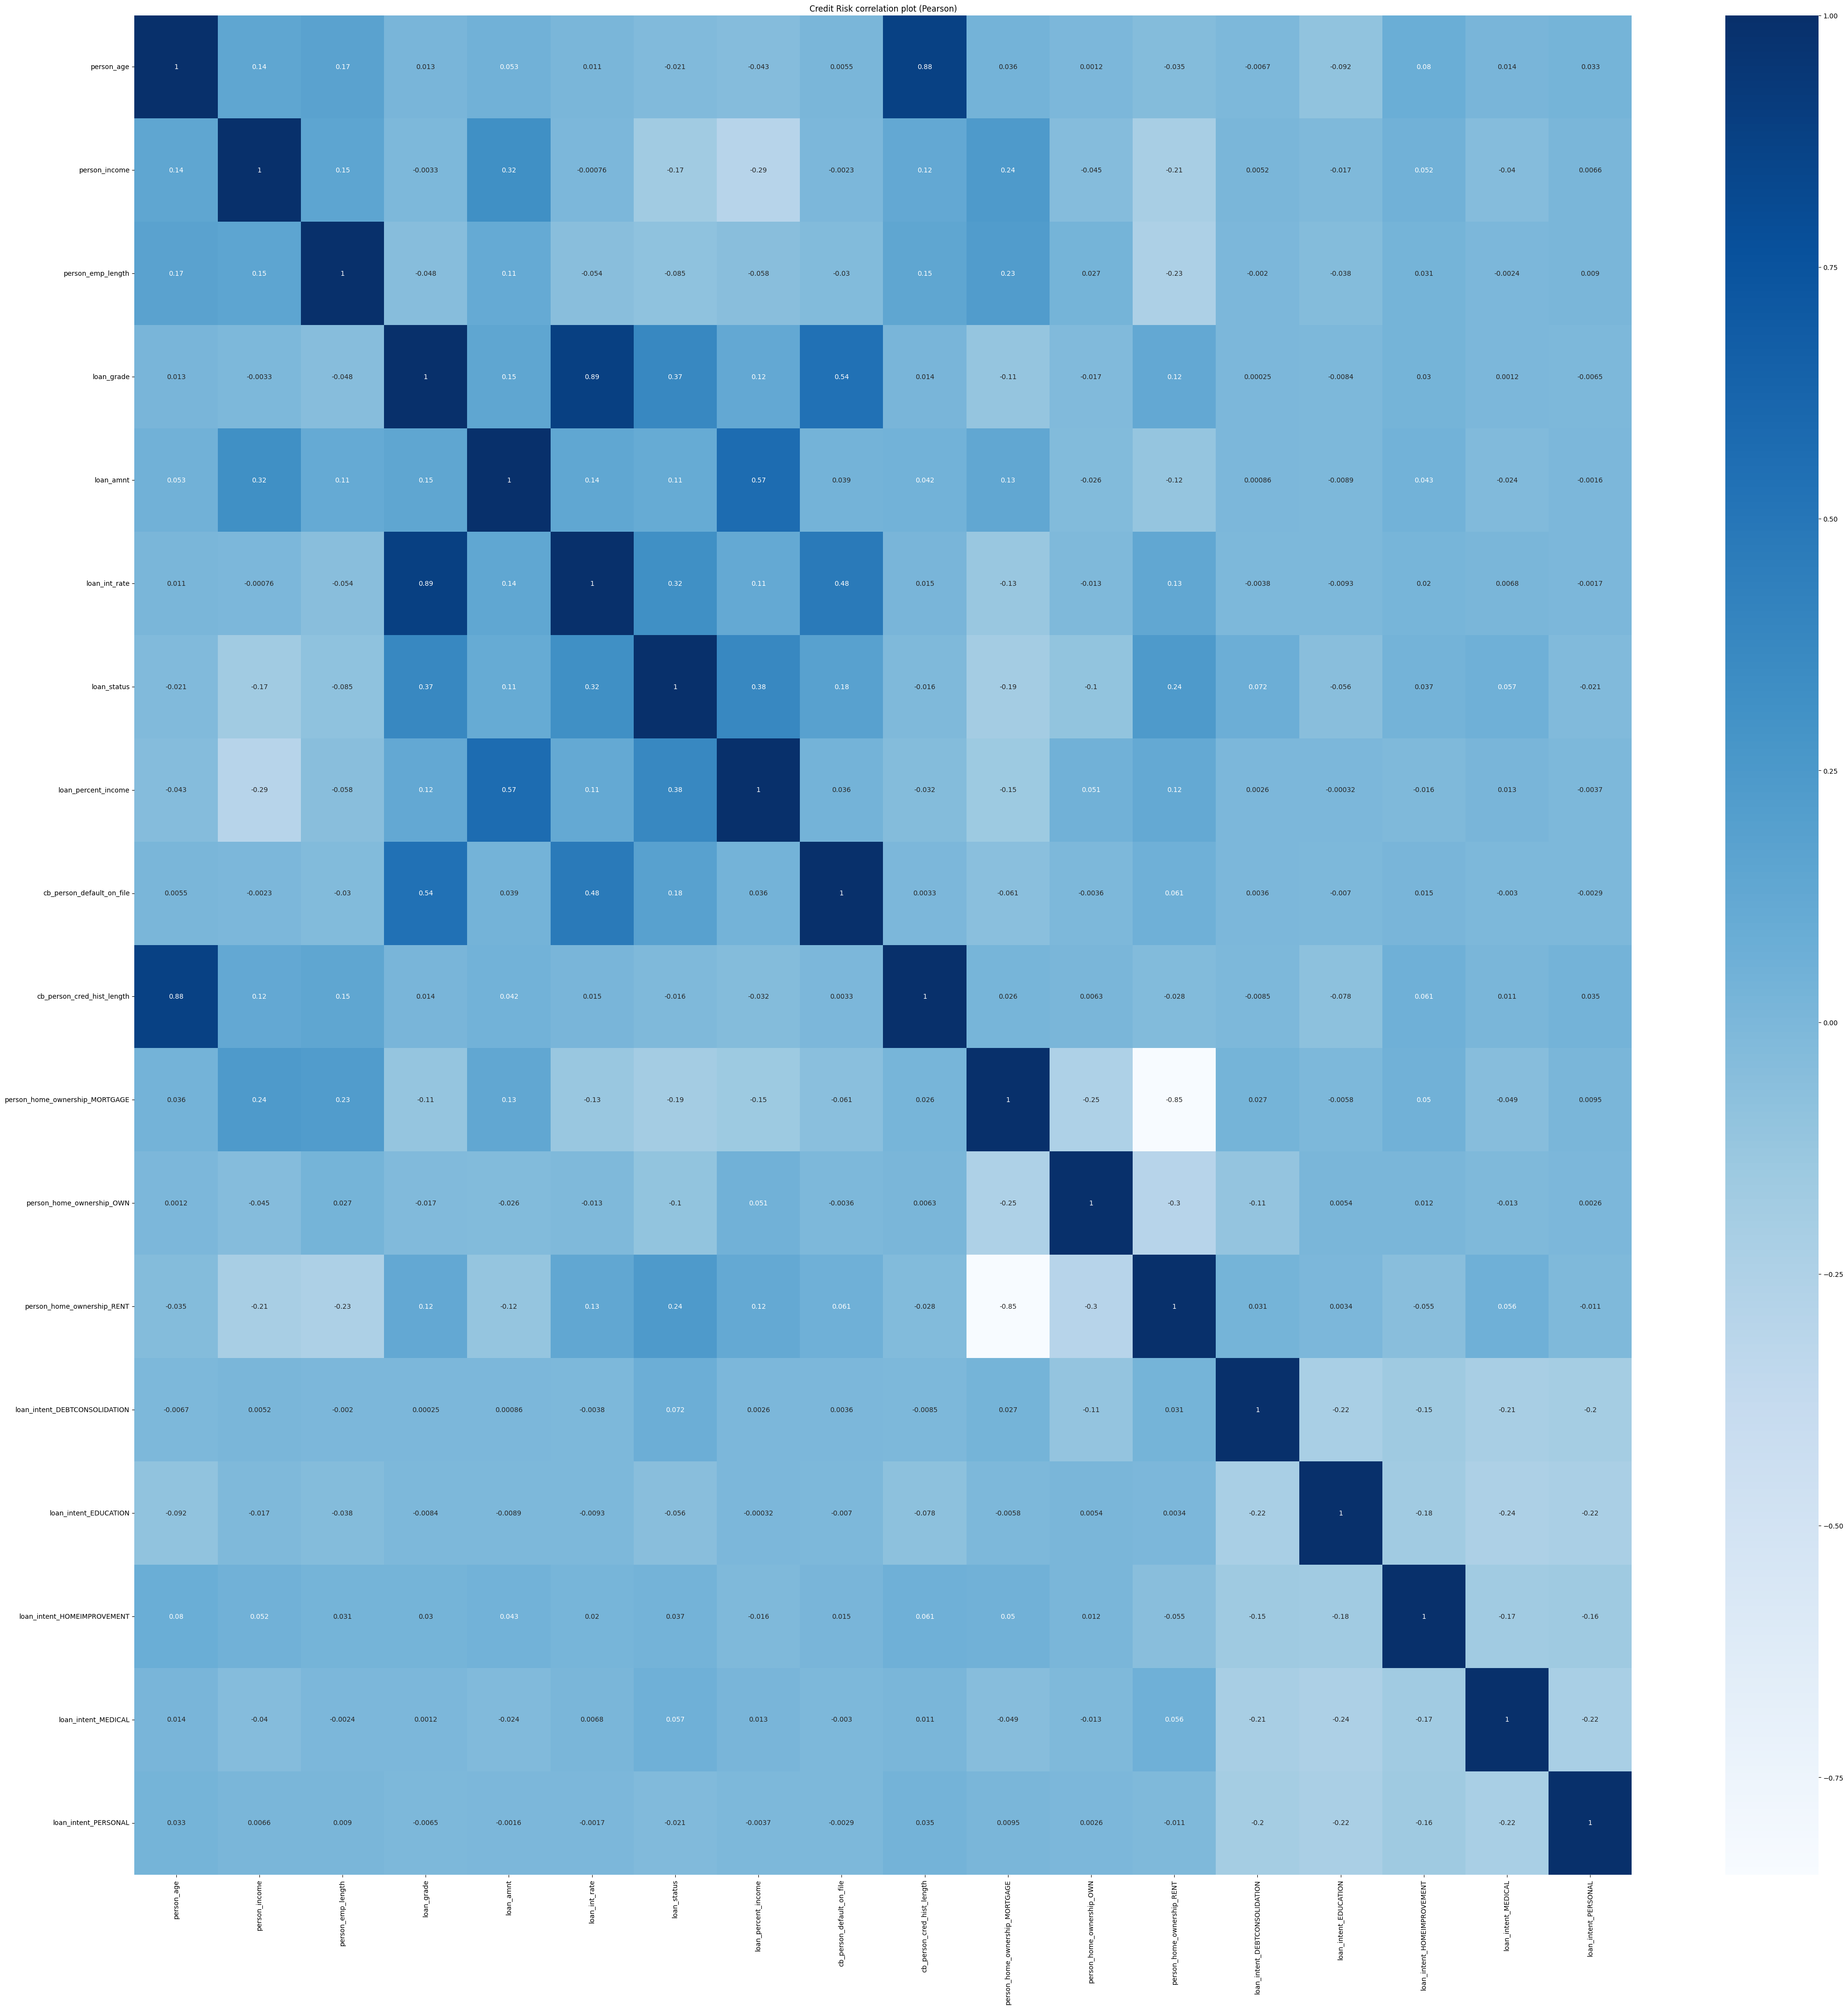

In [36]:
plt.figure(figsize=(50,50))
plt.title('Credit Risk correlation plot (Pearson)')
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [37]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
c=correlation(X,0.80)
print(c)

{'cb_person_cred_hist_length', 'person_home_ownership_RENT', 'loan_int_rate'}


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data.sort_values('VIF', ascending=False)

,feature,VIF
3,loan_grade,10.802171
11,person_home_ownership_RENT,6.042689
9,person_home_ownership_MORTGAGE,5.132222
5,loan_int_rate,4.775857
0,person_age,4.425139
8,cb_person_cred_hist_length,4.356796
4,loan_amnt,2.556683
6,loan_percent_income,2.482759
13,loan_intent_EDUCATION,2.126406
15,loan_intent_MEDICAL,2.060004


In [39]:
non_mul_X = X.drop(['person_age'], axis=1)

In [40]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = non_mul_X.columns
vif_data1["VIF"] = [variance_inflation_factor(non_mul_X.values, i)
                          for i in range(len(non_mul_X.columns))]

vif_data1.sort_values('VIF', ascending=False)

,feature,VIF
2,loan_grade,10.801093
10,person_home_ownership_RENT,6.042122
8,person_home_ownership_MORTGAGE,5.130600
4,loan_int_rate,4.775138
3,loan_amnt,2.556015
5,loan_percent_income,2.481920
12,loan_intent_EDUCATION,2.125270
14,loan_intent_MEDICAL,2.059627
15,loan_intent_PERSONAL,1.959478
11,loan_intent_DEBTCONSOLIDATION,1.932789


# *Modeling*

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(non_mul_X, Y, test_size = 0.2, random_state = 0)


In [42]:
# Modelling packages
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrics packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_auc_score,roc_curve,auc

# *Logistic regression*

In [43]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
fscore = f1_score(Y_test, Y_pred)
score=lr.score(X_train, Y_train)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f'Accuracy train data:{score}')
print(f'Accuracy test data:{accuracy}')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1_score:{fscore}')

Accuracy train data:0.8538007180635447
Accuracy test data:0.8477455219271155
Precision:0.6928571428571428
Recall:0.49780058651026393
F1_score:0.5793515358361775


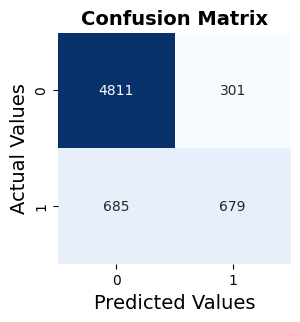

In [44]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted Values", fontsize=14)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel("Actual Values", fontsize=14)
plt.show()

# *SMOTE*


In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(non_mul_X, Y)
y_sm.value_counts()

0    25296
1    25296
Name: loan_status, dtype: int64

In [46]:
sX_train, sX_test, sY_train, sY_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
sY_train.value_counts()

1    20237
0    20236
Name: loan_status, dtype: int64

In [47]:
slr = LogisticRegression()
slr.fit(sX_train,sY_train)
sY_pred = slr.predict(sX_test)
s_fscore = f1_score(sY_test, sY_pred)
s_score=lr.score(sX_train, sY_train)
s_accuracy = accuracy_score(sY_test, sY_pred)
s_precision = precision_score(sY_test, sY_pred)
s_recall = recall_score(sY_test, sY_pred)
print(f'Accuracy train data:{s_score}')
print(f'Accuracy test data:{s_accuracy}')
print(f'Precision:{s_precision}')
print(f'Recall:{s_recall}')
print(f'F1_score:{s_fscore}')

Accuracy train data:0.726385491562276
Accuracy test data:0.7953355074612116
Precision:0.801452784503632
Recall:0.7851354022534097
F1_score:0.7932101847229156


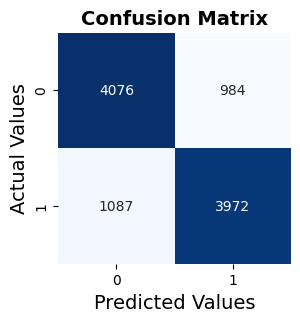

In [48]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(sY_test,sY_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Predicted Values", fontsize=14)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel("Actual Values", fontsize=14)
plt.show()

# *Random forest*

In [49]:
rf = RandomForestClassifier()
rf.fit(sX_train,sY_train)
rf_Y_pred = rf.predict(sX_test)
rf_fscore = f1_score(sY_test, rf_Y_pred)
rf_score=lr.score(sX_train, sY_train)
rf_accuracy = accuracy_score(sY_test, rf_Y_pred)
rf_precision = precision_score(sY_test, rf_Y_pred)
rf_recall = recall_score(sY_test, rf_Y_pred)
print(f'Accuracy train data:{rf_score}')
print(f'Accuracy test data:{rf_accuracy}')
print(f'Precision:{rf_precision}')
print(f'Recall:{rf_recall}')
print(f'F1_score:{rf_fscore}')

Accuracy train data:0.726385491562276
Accuracy test data:0.9383338274533056
Precision:0.9778065072182719
Recall:0.8970152203992884
F1_score:0.9356701030927835


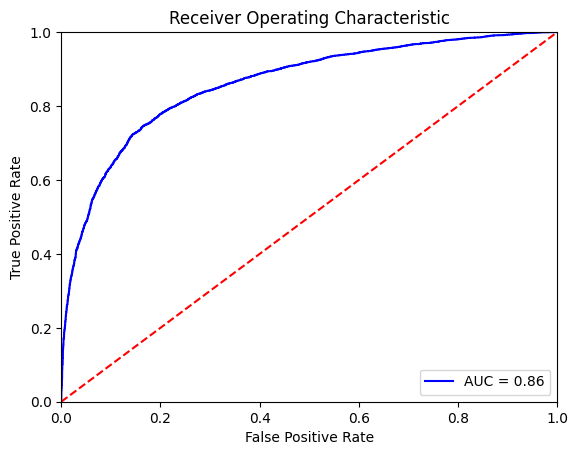

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(sY_test,lr.predict_proba(sX_test)[:,1])
roc_auc=auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
pred = (lr.predict_proba(sX_test)[:,1] >= 0.2).astype(bool)

In [52]:
t_score=lr.score(sX_train, sY_train)
t_accuracy = accuracy_score(sY_test, pred)
t_precision = precision_score(sY_test, pred)
t_recall = recall_score(sY_test, pred)
t_fscore = f1_score(sY_test, pred)


print(f'Accuracy train data:{t_score}')
print(f'Accuracy test data:{t_accuracy}')
print(f'Precision:{t_precision}')
print(f'Recall:{t_recall}')
print(f'F1_score:{t_fscore}')

Accuracy train data:0.726385491562276
Accuracy test data:0.7871331159205455
Precision:0.7828627069133398
Recall:0.7946234433682546
F1_score:0.7886992348440259


# *AdaBoost Classifier*

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(sX_train,sY_train)
ada_pred = ada.predict(sX_test)
ada_fscore = f1_score(sY_test, ada_pred)
ada_score=ada.score(sX_train, sY_train)
ada_accuracy = accuracy_score(sY_test, ada_pred)
ada_precision = precision_score(sY_test, ada_pred)
ada_recall = recall_score(sY_test, ada_pred)
print(f'Accuracy train data:{ada_score}')
print(f'Accuracy test data:{ada_accuracy}')
print(f'Precision:{ada_precision}')
print(f'Recall:{ada_recall}')
print(f'F1_score:{ada_fscore}')

Accuracy train data:0.9130037308823166
Accuracy test data:0.9092795730803439
Precision:0.9289413714522478
Recall:0.886341174145088
F1_score:0.9071414120979163


# *GradientBoost Classifier*

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000).fit(sX_train, sY_train)
gb_pred = gb.predict(sX_test)
gb_fscore = f1_score(sY_test, gb_pred)
gb_score=ada.score(sX_train, sY_train)
gb_accuracy = accuracy_score(sY_test, gb_pred)
gb_precision = precision_score(sY_test, gb_pred)
gb_recall = recall_score(sY_test, gb_pred)
print(f'Accuracy train data:{gb_score}')
print(f'Accuracy test data:{gb_accuracy}')
print(f'Precision:{gb_precision}')
print(f'Recall:{gb_recall}')
print(f'F1_score:{gb_fscore}')

Accuracy train data:0.9130037308823166
Accuracy test data:0.9529597786342524
Precision:0.9912111468381565
Recall:0.9140146273967187
F1_score:0.951048951048951
